## Testing transforms.py

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *
from fastai.dataset import *

In [3]:
PATH = "data/fish/"

### Fish with bounding box

In [4]:
fnames,corner_labels,_,_ = parse_csv_labels(f'{PATH}trn_bb_corners_labels', skip_header=False)

In [5]:
def get_x(f):
    file_path = f'{PATH}/images/{f}'
    im = PIL.Image.open(file_path).convert('RGB')
    return np.array(im, dtype=np.float32)/255.

In [6]:
f = 'img_02642.jpg'
x = get_x(f)
y = np.array(corner_labels[f], dtype=np.float32)
y

array([  699.399,   954.697,   895.326,  1275.3  ], dtype=float32)

In [7]:
corner_labels["img_02642.jpg"]

['699.399', '954.697', '895.326', '1275.3']

In [8]:
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def show_corner_bb(f='img_04908.jpg'):
    file_path = f'{PATH}images/{f}'
    bb = corner_labels[f]
    plots_from_files([file_path])
    plt.gca().add_patch(create_corner_rect(bb))

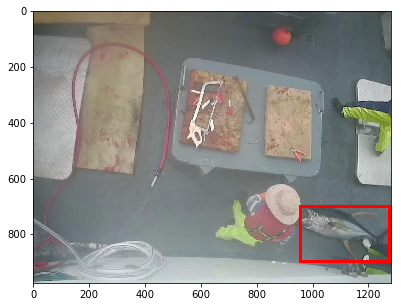

In [9]:
show_corner_bb(f = 'img_02642.jpg')

In [10]:
def get_x(f):
    file_path = f'{PATH}/images/{f}'
    im = PIL.Image.open(file_path).convert('RGB')
    return np.array(im, dtype=np.float32)/255.

In [11]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def plotXY(x,y):
    plots([x])
    plt.gca().add_patch(create_rect(y))

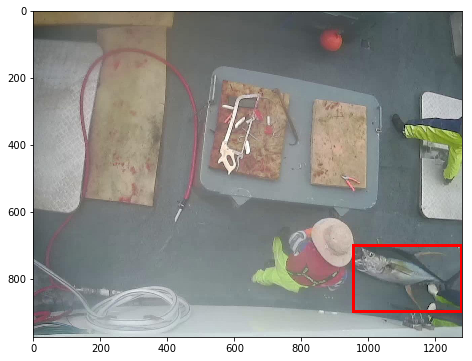

In [12]:
plotXY(x,y)

## Scale

In [21]:
xx, yy = ScaleXY(sz=350, tfm_y=TfmType.COORD)(x, y)

(974, 1280)


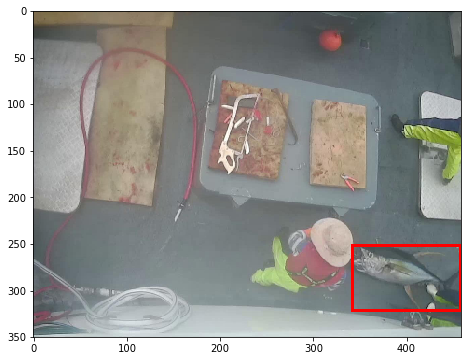

In [22]:
plotXY(xx,yy)

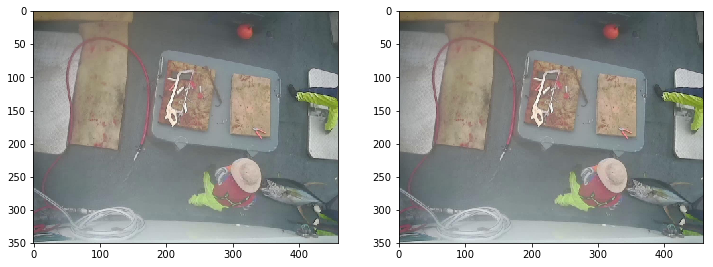

In [56]:
xx, yy = ScaleXY(sz=350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomScale

In [24]:
xx, yy = RandomScaleXY(sz=350, max_zoom=1.1, tfm_y=TfmType.COORD)(x, y)

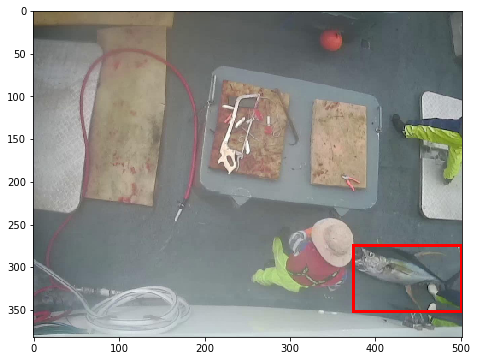

In [25]:
plotXY(xx,yy)

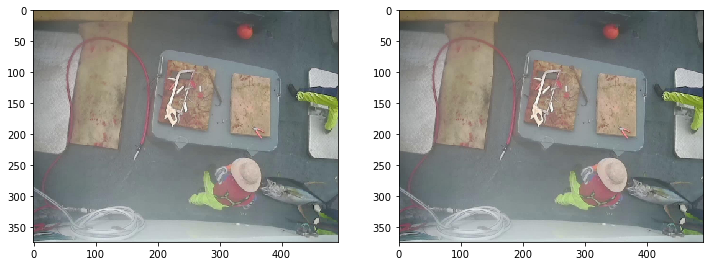

In [57]:
xx, yy = RandomScaleXY(sz=350, max_zoom=1.1, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomCrop

In [42]:
xx, yy = RandomCropXY(targ=350, tfm_y=TfmType.COORD)(x, y)

loss my fish


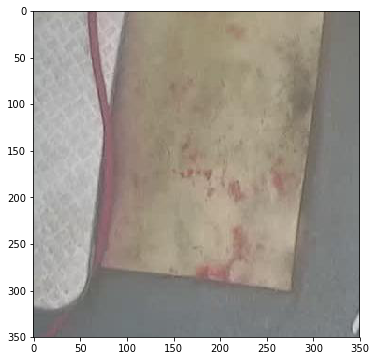

In [43]:
plotXY(xx,yy)

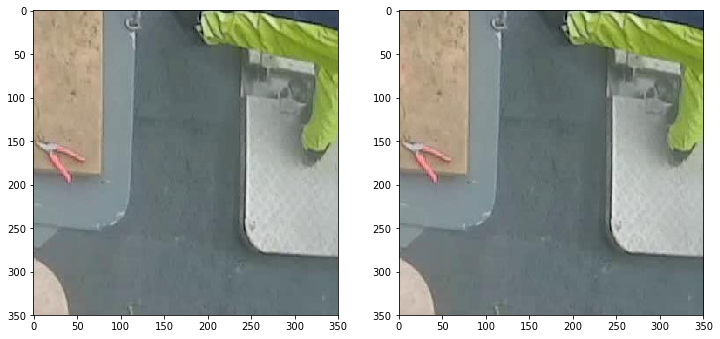

In [59]:
xx, yy = RandomCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## No Cropping

In [46]:
xx, yy = NoCropXY(350, tfm_y=TfmType.COORD)(x, y)

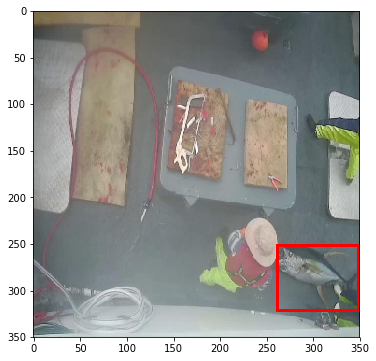

In [49]:
plotXY(xx,yy)

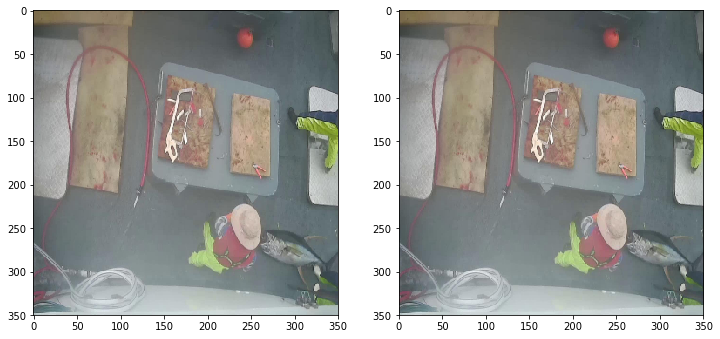

In [60]:
xx, yy = NoCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## CenterCrop

In [52]:
xx, yy = CenterCropXY(350, tfm_y=TfmType.COORD)(x, y)

loss my fish


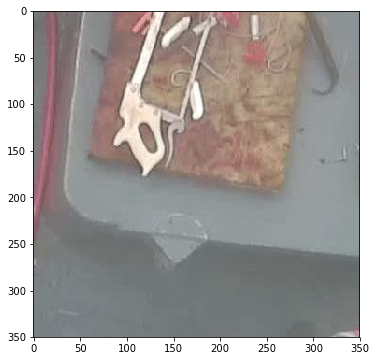

In [53]:
plotXY(xx,yy)

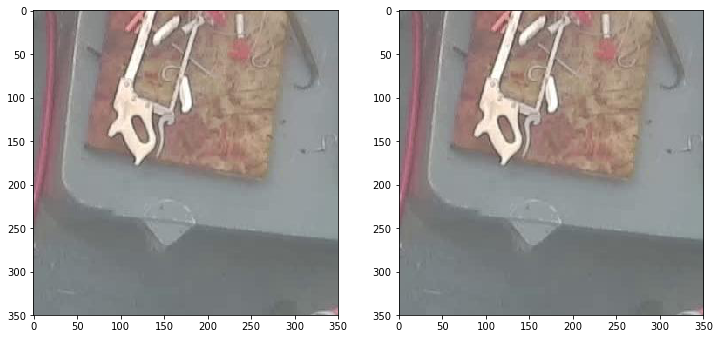

In [61]:
xx, yy = CenterCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## Random Dihedral

In [210]:
xx, yy = RandomDihedralXY(TfmType.COORD)(x, y)

In [211]:
print(yy)

[ 955  699 1275  895]


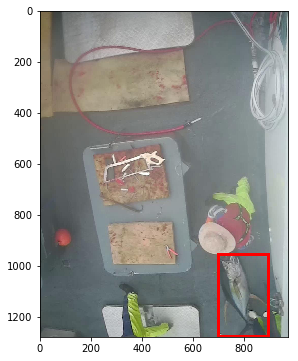

In [212]:
plotXY(xx,yy)

In [214]:
xx, yy = RandomDihedralXY(tfm_y=TfmType.PIXEL)(x, x)

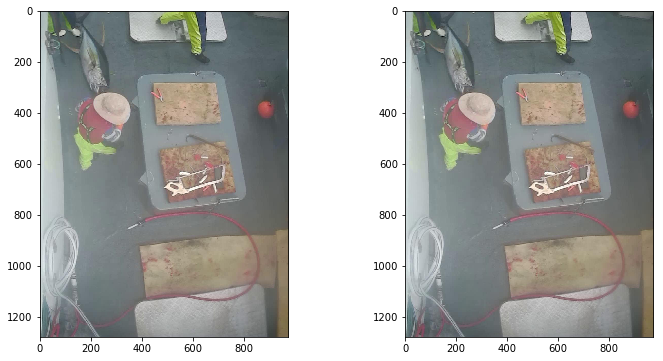

In [215]:
plots([xx,yy])

## RandomFlipXY

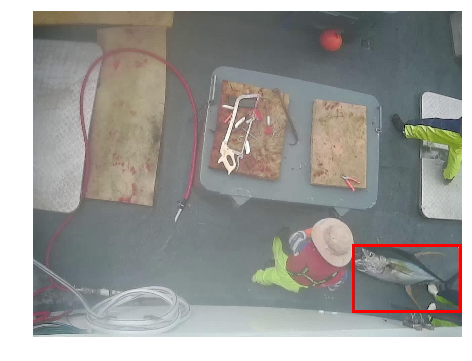

In [81]:
xx, yy = RandomFlipXY(TfmType.COORD)(x, y)
plotXY(xx,yy)

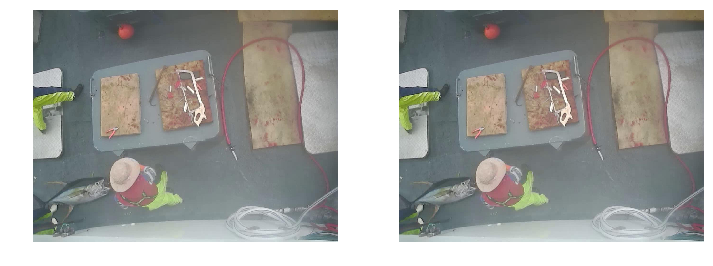

In [82]:
xx, yy = RandomFlipXY(TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomLightingXY (talk to Jeremy about this)

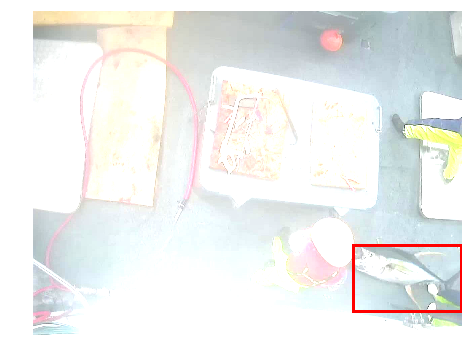

In [83]:
xx, yy = RandomLightingXY(0.5, 0.5)(x, y)
plotXY(xx,yy)

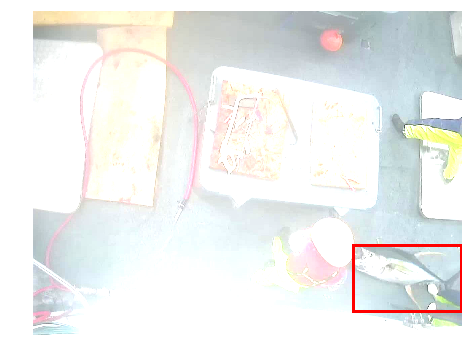

In [84]:
xx, yy = RandomLightingXY(0.5, 0.5, TfmType.COORD)(x, y)
plotXY(xx,yy)

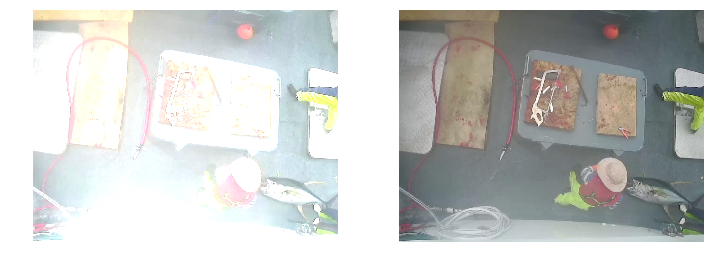

In [85]:
# talk to Jeremy about this
xx, yy = RandomLightingXY(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomRotate

In [ ]:
def random_px_rect(y, simple=True):
    rows0 = np.array([y[0], y[0], y[2], y[2]])
    cols0 = np.array([y[1], y[3], y[1], y[3]])
    if simple:
        return np.rint(rows0).astype(int), np.rint(cols0).astype(int)
    n = [np.random.randint(2, 3) for i in range(4)]
    rand_rows = np.hstack([np.random.uniform(y[0], y[2], size=n[i]) for i in range(2)])
    fixed_cols = np.hstack([ y[j] * np.ones(n[i]) for i, j in zip(range(0,2), [1,3])])
    rand_cols = np.hstack([np.random.uniform(y[1], y[3], size=n[i]) for i in range(2,4)])
    fixed_rows = np.hstack([y[j] * np.ones(n[i]) for i, j in zip(range(2,4),[0,2])])
    rows = np.hstack([rows0, rand_rows, fixed_rows])
    cols = np.hstack([cols0, fixed_cols, rand_cols])
    return np.rint(rows).astype(int), np.rint(cols).astype(int)

-18.21305854148094 True


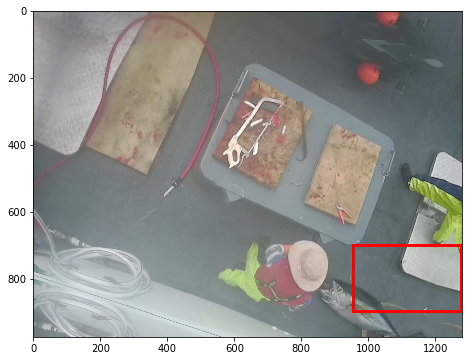

In [199]:
xx, yy = RandomRotateXY(deg=30)(x, y)
plotXY(xx,yy)

In [127]:
y

array([  699.399,   954.697,   895.326,  1275.3  ], dtype=float32)

In [129]:
y.shape[0]

4

9.384577572687789 True
I am here
random_px rows [ 699.399   699.399   895.326   895.326   746.2047  810.7041  874.014   795.3898  699.399   699.399
  895.326   895.326 ]
random_px cols [  954.697   1275.3      954.697   1275.3      954.697    954.697   1275.3     1275.3     1082.5565
  1101.3688  1111.3577   963.0864]
trans rows [620 621 621 622 623 624 624 625 644 644 645 645 691 691 692 692 755 755 756 756 812 812 813 813 836
 836 837 837 838 838 839 839 967 967 968 968]
trans rows [620 621 621 622 623 624 624 625 644 644 645 645 691 691 692 692 755 755 756 756 812 812 813 813 836
 836 837 837 838 838 839 839 967 967 968 968]
yy [ 620  985  968 1197]


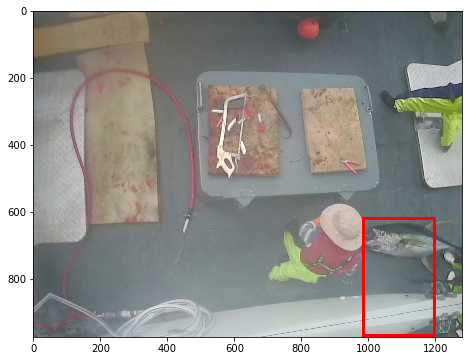

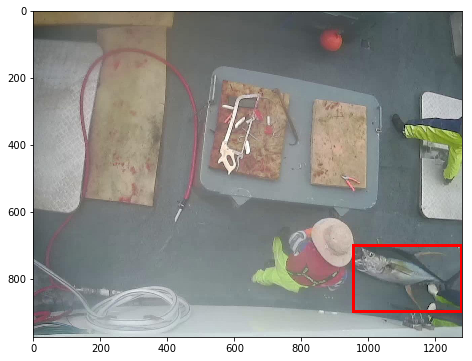

In [206]:
xx, yy = RandomRotateXY(130,p=1.0, tfm_y=TfmType.COORD)(x, y)
print("yy", yy)
plotXY(xx,yy)
plotXY(x, y)

In [185]:
y

array([  699.399,   954.697,   895.326,  1275.3  ], dtype=float32)

-0.4809104850654682 True


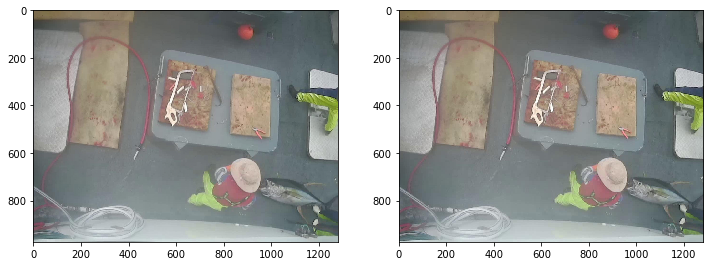

In [167]:
xx, yy = RandomRotateXY(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])